The following piece of code classifies textures in images using Gabor filters by training a machine learning model  on features extracted by Gabor filters to classify images into different texture categories. 

In [34]:
#importing the necessary libraries
import cv2
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [23]:
#function for preprocessing the dataset
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif"):
            images.append(os.path.join(folder_path, filename))
    return images

def preprocess_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize image to a consistent size (e.g., 100x100)
    resized_image = cv2.resize(image, (100, 100))
    return resized_image

In [13]:
#function for feature extraction using gabor filters
def extract_gabor_features(image):
    num_filters = 8
    feature_vectors = []
    for theta in range(num_filters):
        # Create Gabor filter with varying orientations
        gabor_filter = cv2.getGaborKernel((5, 5), 8.0, theta * np.pi / num_filters, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        # Apply Gabor filter to the image
        filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_filter)
        # Compute statistical measures (e.g., mean, std deviation) from filtered image
        mean, std_dev = np.mean(filtered_image), np.std(filtered_image)
        feature_vectors.extend([mean, std_dev])
    return feature_vectors

In [14]:
#function for creating feature vector
def create_feature_vectors(image_paths):
    feature_vectors = []
    for image_path in image_paths:
        # Preprocess image
        image = preprocess_image(image_path)
        # Extract Gabor features
        gabor_features = extract_gabor_features(image)
        feature_vectors.append(gabor_features)
    return np.array(feature_vectors)

In [28]:
# clustering
def cluster_images(X, num_clusters):
    # Choose the number of clusters (you may need to experiment with this)
    num_clusters = 3
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    return clusters, kmeans

In [30]:
# model evalution
def evaluate_clustering(X, clusters, kmeans):
    # Inertia (Sum of squared distances of samples to their closest cluster center)
    inertia = kmeans.inertia_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(X, clusters)
    
    print("Inertia:", inertia)
    print("Silhouette Score:", silhouette_avg)

In [35]:
# testing model
def test_model(image_paths, clusters):
    # Creating a dictionary to store image paths for each cluster
    cluster_images_dict = {}
    for i, cluster in enumerate(clusters):
        if cluster not in cluster_images_dict:
            cluster_images_dict[cluster] = []
        cluster_images_dict[cluster].append(image_paths[i])
    
    # Visualizing images in each cluster
    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111, nrows_ncols=(num_clusters, 5), axes_pad=0.1)

    for i in range(num_clusters):
        for j in range(5):  
            if j < len(cluster_images_dict[i]):
                image = cv2.imread(cluster_images_dict[i][j], cv2.IMREAD_GRAYSCALE)
                grid[i * 5 + j].imshow(image, cmap='gray')
                grid[i * 5 + j].axis('off')
            else:
                break

    plt.show()


Number of images found: 112
Number of feature vectors extracted: 112
Inertia: 2.2705227264463366
Silhouette Score: 0.9794659320350027


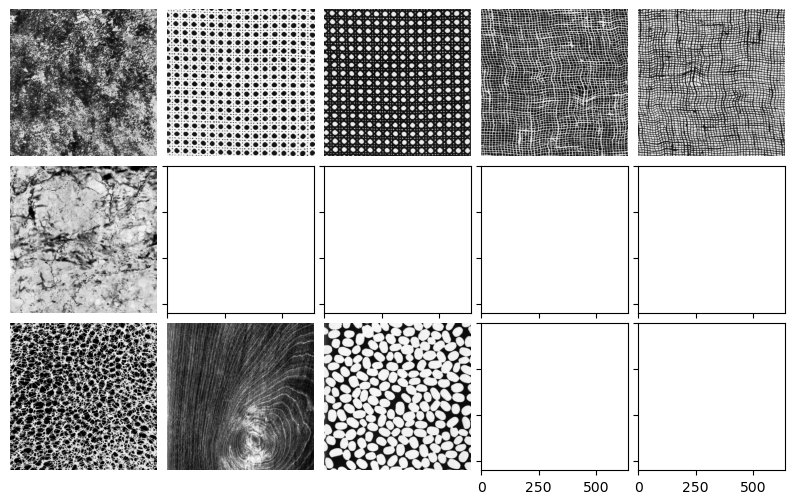

In [36]:
# folder containing the images
folder_path = r"C:\Users\MAREH WILLIAM\Downloads\Colored_Brodatz\Colored Brodatz"

# Load images from the folder
image_paths = load_images_from_folder(folder_path)
print("Number of images found:", len(image_paths))

# feature extraction
X = create_feature_vectors(image_paths)
print("Number of feature vectors extracted:", len(X))

# Cluster the images
num_clusters = 3
clusters, kmeans = cluster_images(X, num_clusters)

# Evaluate clustering
evaluate_clustering(X, clusters, kmeans)

# testing
test_model(image_paths, clusters)